This notebook provides a step-by-step guide for reproducing the experimental results reported in our paper, *Graph-Guided Sparse Learning via Boolean Relaxation*.


In [1]:
from random_ensemble import RandomEnsembleCorrelation, RandomEnsembleCorrelationWeight


We import the classes `RandomEnsembleCorrelation` and `RandomEnsembleCorrelationWeight`, which correspond to **Random Ensemble I** and **Random Ensemble II** in the paper, respectively.

Both classes require the following parameters:

* `n`: number of samples
* `d`: number of features
* `k`: sparsity level (i.e., number of non-zero coefficients)
* `p` *(optional, default = 0.95)*: probability of edges forming between two selected features or two non-selected features
* `q` *(optional, default = 0.01)*: probability of edges forming between a selected feature and a non-selected feature
* `gamma`: standard deviation of the noise added to the response
* `correlated_ratio` *(optional, default = 0.3)*: fraction of selected features that are correlated with non-selected features


Here we create a random ensemble:

In [2]:
demo = RandomEnsembleCorrelation(n=20, d=100, k=10, p=0.95, q=0.01, gamma=0.1, correlated_ratio=0.2)

We use the `run` method to evaluate **support recovery accuracy**. This method accepts two optional parameters:

* `num_replications`: number of repetitions for the experiment (default: 10)
* `models`: list of models to evaluate (default: all models discussed in the paper — `gfl_pqn`, `gfl_proximal`, `lasso`, `adaptive_grace`, and `signal_family`)

The `signal_family` includes the following algorithms: `gen-mp`, `dmo-acc-fw`, `graph-cosamp`, `cosamp`, and `graph-iht`. These methods originate from the study of compressed sensing signal sparse recovery.

In [3]:
accuracy = demo.run(num_replications=2, models=['gfl_pqn', 'gfl_proximal', 'signal_family'])

Running gfl_pqn
Running gfl_proximal
Running gen-mp
Running dmo-acc-fw
Running graph-cosamp
Running cosamp
Running graph-iht
Running gfl_pqn
Running gfl_proximal
Running gen-mp
Running dmo-acc-fw
Running graph-cosamp
Running cosamp
Running graph-iht
Model: gfl_pqn, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Model: gfl_proximal, Avg. Accuracy: 0.9, Std. Accuracy: 0.09999999999999998
Model: gen-mp, Avg. Accuracy: 0.35, Std. Accuracy: 0.15
Model: dmo-acc-fw, Avg. Accuracy: 0.4, Std. Accuracy: 0.0
Model: graph-cosamp, Avg. Accuracy: 0.4, Std. Accuracy: 0.0
Model: cosamp, Avg. Accuracy: 0.3, Std. Accuracy: 0.0
Model: graph-iht, Avg. Accuracy: 0.25, Std. Accuracy: 0.04999999999999999


To observe how support recovery accuracy varies with sample size, you can pass a list of sample sizes to the function `support_recovery_analysis`, which generates the plots shown in the paper.

This function accepts the following parameters:

* `accuracy`: list of support recovery accuracies
* `sample_sizes`: list of corresponding sample sizes
* `file_name` *(optional, default: None)*: name of the file to save the plot; if set to `None`, the plot will not be saved



In [4]:
import numpy as np
sample_sizes = np.arange(10, 100, 20)
accuracy = []
for sample_size in sample_sizes:
    demo_sample = RandomEnsembleCorrelation(n=sample_size, d=100, k=10, p=0.95, q=0.01, gamma=0.1, correlated_ratio=0.2)
    accuracy_sample = demo_sample.run(num_replications=1, models=['gfl_pqn', 'gfl_proximal'])
    accuracy.append(accuracy_sample)


Running gfl_pqn
Running gfl_proximal
Model: gfl_pqn, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Model: gfl_proximal, Avg. Accuracy: 0.8, Std. Accuracy: 0.0
Running gfl_pqn
Running gfl_proximal
Model: gfl_pqn, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Model: gfl_proximal, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Running gfl_pqn
Running gfl_proximal
Model: gfl_pqn, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Model: gfl_proximal, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Running gfl_pqn
Running gfl_proximal
Model: gfl_pqn, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Model: gfl_proximal, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Running gfl_pqn
Running gfl_proximal
Model: gfl_pqn, Avg. Accuracy: 1.0, Std. Accuracy: 0.0
Model: gfl_proximal, Avg. Accuracy: 1.0, Std. Accuracy: 0.0


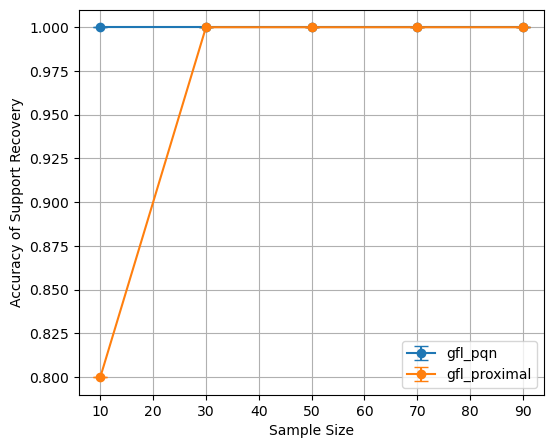

{'gfl_pqn': [1.0, 1.0, 1.0, 1.0, 1.0],
 'gfl_proximal': [0.8, 1.0, 1.0, 1.0, 1.0]}

In [5]:
from utils.visualization import support_recovery_analysis
support_recovery_analysis(accuracy, sample_sizes)

We can also evaluate out-of-sample mean squared error (MSE) to select the optimal sparsity level `k` using the `out_of_sample` method. This method accepts the following optional parameters:

* `k_values`: list of `k` values to evaluate (default: the full set of `k` values considered in the paper)
* `num_replications`: number of repetitions for the experiment (default: 10)
* `model`: the model to evaluate (default: `'gfl_pqn'`, the proposed method in the paper)

This analysis helps identify the `k` that yields the best predictive performance under different sample sizes and noise levels.

In [3]:
import numpy as np
k_values = np.arange(5, 20, 5)
mse_results = demo.out_of_sample(k_values, num_replications=1, model='gfl_pqn')

Replication 1/1 with model gfl_pqn, k=5, MSE=1.5803
Replication 1/1 with model gfl_pqn, k=10, MSE=0.0038
Replication 1/1 with model gfl_pqn, k=15, MSE=0.1506


You can use the `plot_out_of_sample_mse` function to visualize the out-of-sample MSE results reported in the paper. It accepts the following parameters:

- `mse_results`: the result returned by the `out_of_sample` method  
- `true_k`: the ground-truth sparsity level  
- `file_name` *(optional, default: None)*: the name of the file to save the plot; if set to `None`, the plot will not be saved

/Users/aolongli/Desktop/Research-GFL/Experiement/code/Graph-Guided-Sparse-Learning/utils/visualization.py:72: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(k_vals, mse_means, yerr=mse_stds, fmt='o-', capsize=4, linestyle='--', color='r', label="Estimated MSE")


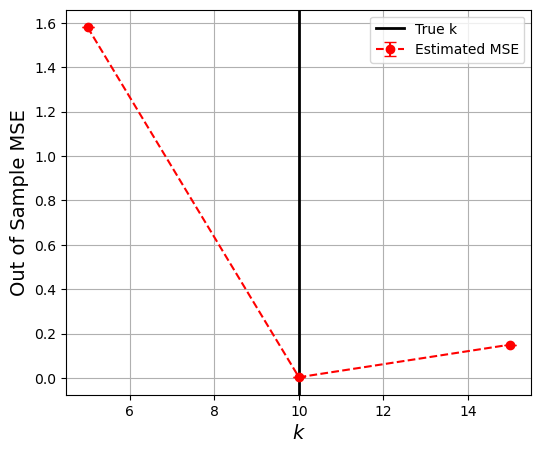

In [4]:
from utils.visualization import plot_out_of_sample_mse
plot_out_of_sample_mse(mse_results, true_k=10)

In [1]:
from solver import Solver

You can also import the `Solver` class to obtain the selected features for a given model. It accepts the following parameters:

- `models`: a list of models to evaluate  
- `c` *(optional, default: 1)*: a parameter required by the signal family methods, representing an upper bound on the $\ell_2$-norm of the estimated weight vector

In experiments where the ground-truth weight vector is known, `c` is typically set to match the $\ell_2$-norm of the true weights.  
For inference tasks where the true weights are unknown, `c` is set to 1 by default.


In [ ]:
import numpy as np
import scipy.sparse as sp

# generate the data
X = np.random.randn(20, 50)
y = np.random.randn(20)
A = sp.csr_matrix(np.triu((np.random.rand(50,50) < 0.05).astype(int), k=1))
A = A + A.T
L = sp.csgraph.laplacian(A, normed=False).astype(np.float64) # make sure it is a float64 otherwise matlab doesn't like it

models = ["gfl_pqn", "signal_family"]
solver = Solver(models, c=1)
res = solver.fit(X, y, L, A, k=2)


In [ ]:
res

defaultdict(list,
            {'gfl_pqn': array([2.80968663e-12, 3.20970828e-12, 4.10334832e-12, 4.93402688e-12,
                    3.05912985e-12, 2.06479250e-01, 2.60457985e-12, 2.79175102e-12,
                    4.88941052e-12, 2.73062099e-12, 4.33361135e-12, 1.07995328e-11,
                    2.77997129e-12, 2.76390876e-12, 6.66357916e-11, 2.68743878e-01,
                    7.53595781e-12, 5.45562058e-12, 3.37880794e-02, 1.66378896e-08,
                    3.03445799e-12, 3.13694324e-12, 2.82451767e-12, 3.19875984e-12,
                    4.00528061e-12, 3.14329087e-07, 3.46230432e-12, 3.52747063e-12,
                    2.62385152e-12, 2.22677016e-01, 3.36893958e-12, 2.71545805e-12,
                    2.88087819e-12, 6.18388381e-12, 3.31126680e-12, 3.20665178e-12,
                    5.98928729e-12, 2.89308774e-11, 2.75070341e-12, 2.60373175e-12,
                    2.99785098e-12, 2.92762529e-12, 2.68471048e-12, 3.44791192e-01,
                    5.62668093e-01, 1.14382871e

In [11]:
res['gen-mp']

array([ 0.        ,  0.        ,  0.        , -0.06841064,  0.        ,
       -0.23480336,  0.        ,  0.        , -0.03814759,  0.        ,
        0.        , -0.06045676,  0.        ,  0.        ,  0.        ,
       -0.18886253, -0.11768222,  0.        , -0.05811464, -0.25083951,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.05897697,  0.        ,  0.        ,  0.        , -0.10057202,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.1530084 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.25089802,  0.31563872,
       -0.12487438,  0.16094206,  0.        ,  0.        ,  0.        ])